** Step 1: load MNIST data from sklearn module **

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

** Have a look on the dataset **

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist['data'],mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [5]:
some_digit = X[30]
some_digit = some_digit.reshape(28,28)

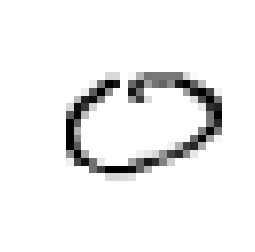

In [6]:
plt.imshow(some_digit,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [7]:
y[30]

0.0

** Create training set and test set **

In [8]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [9]:
import numpy as np

In [10]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

** Train a binary classifier for five or not five **

In [15]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [16]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [17]:
sgd_clf.predict(X_test[5])

C:\Users\Kevin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([False], dtype=bool)

In [18]:
y_test_5[5]

False

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5,cv=3, scoring='accuracy')

array([ 0.9656 ,  0.96575,  0.9632 ])

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)